In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/Cas/.julia/dev/MDLearn/vac_calc')

In [2]:
import utilities
import vacancy
import pyjulip

In [3]:
from ase.io import read, write
at = read("hcp_vac.xyz")

In [17]:
E_vacs = []
model_i = []

for i in range(1,11):
    calculator = pyjulip.ACE("../exampleTB_com_vac/Ti_NRLTB_vac_3_N3_16_DB{}.json".format(i))
    at.set_calculator(calculator)
    properties = vacancy.do_one_vacancy(at, calculator, nn_cutoff=2.7)
    model_i.append(i)
    E_vacs.append(properties[4])  

   -330.791617       0.4983
PreconLBFGS:  27  12:59:23     -330.871794       0.5116
PreconLBFGS:  28  12:59:23     -330.943153       0.6699
PreconLBFGS:  29  12:59:23     -331.007706       0.4614
PreconLBFGS:  30  12:59:23     -331.079727       0.4330
PreconLBFGS:  31  12:59:23     -331.141766       0.6260
PreconLBFGS:  32  12:59:23     -331.239566       0.8666
PreconLBFGS:  33  12:59:24     -331.325880       0.9192
PreconLBFGS:  34  12:59:24     -331.362135       0.8698
PreconLBFGS:  35  12:59:24     -331.405499       0.7833
PreconLBFGS:  36  12:59:24     -331.435027       0.2709
PreconLBFGS:  37  12:59:24     -331.447836       0.1622
PreconLBFGS:  38  12:59:24     -331.461841       0.1820
PreconLBFGS:  39  12:59:24     -331.473551       0.2008
PreconLBFGS:  40  12:59:24     -331.492482       0.2025
PreconLBFGS:  41  12:59:24     -331.499791       0.1247
PreconLBFGS:  42  12:59:24     -331.504313       0.1192
PreconLBFGS:  43  12:59:24     -331.508177       0.1240
PreconLBFGS:  44  12

In [18]:
import matplotlib.pyplot as plt

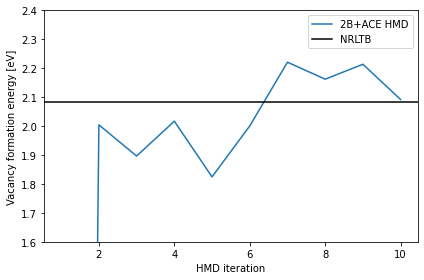

In [43]:
plt.plot(model_i, E_vacs, label="2B+ACE HMD")
plt.axhline(y=2.0833632655626957, color="black", label="NRLTB")
plt.ylim(1.6,2.4)
plt.xlabel("HMD iteration")
plt.ylabel("Vacancy formation energy [eV]")
plt.legend()
plt.tight_layout()
plt.savefig("HMD_Ti_NRLTB_vac.pdf")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]